# Movie Rating Prediction

## Exploratory Data Analysis

### Load the dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
movie_data=pd.read_csv("movie_metadata.csv")
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Features Description
* Total Predictors (27)

> **Quantitative Features** (15)
* **Descrete** (3)
    * num_voted_users
    * cast_total_facebook_likes
    * movie_facebook_likes
* **Continues** (12)
    * num_critic_for_reviews
    * duration
    * director_facebook_likes
    * actor_3_facebook_likes
    * actor_1_facebook_likes
    * gross
    * facenumber_in_poster
    * num_user_for_reviews
    * budget
    * title_year
    * actor_2_facebook_likes
    * aspect_ratio



> **Qualittive Features** (13)
* **Nominal** (13)
    * color
    * director_name
    * genres
    * actor_1_name
    * movie_title
    * actor_2_name
    * plot_keywords
    * movie_imdb_link
    * actor_3_name
    * language
    * country
    * content_rating

### Target Variable : imdb_score (continues feature)

### Identify Features with Missing Data

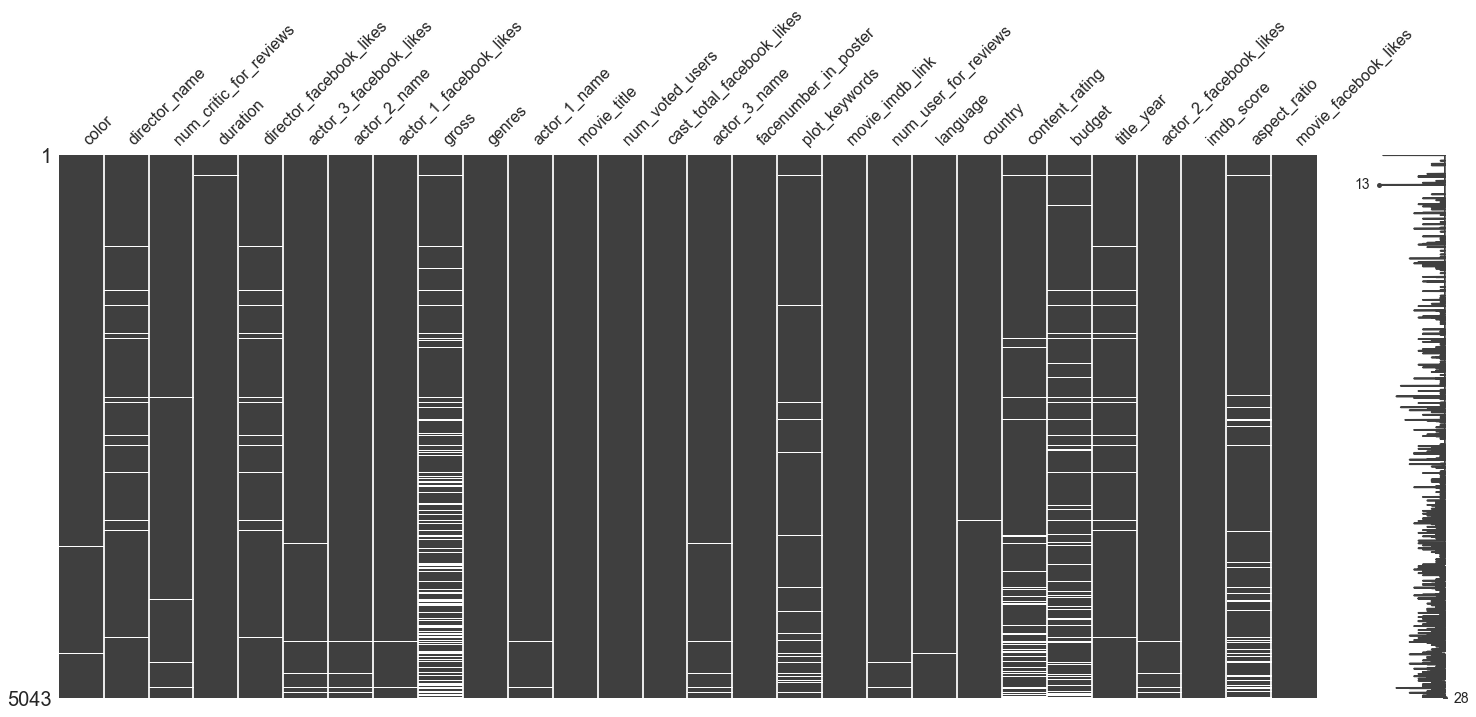

In [3]:
msno.matrix(movie_data)

In [4]:
def show_missing_featues():
    missing=movie_data.columns[movie_data.isnull().any()].tolist()
    return missing

print('Dataset size: ',movie_data.shape[0])
print('Features that are having missing data(%):')
movie_data[show_missing_featues()].isnull().sum()/movie_data.shape[0]*100

Dataset size:  5043
Features that are having missing data(%):


color                       0.376760
director_name               2.062265
num_critic_for_reviews      0.991473
duration                    0.297442
director_facebook_likes     2.062265
actor_3_facebook_likes      0.456078
actor_2_name                0.257783
actor_1_facebook_likes      0.138806
gross                      17.529248
actor_1_name                0.138806
actor_3_name                0.456078
facenumber_in_poster        0.257783
plot_keywords               3.033908
num_user_for_reviews        0.416419
language                    0.237954
country                     0.099147
content_rating              6.008328
budget                      9.756098
title_year                  2.141582
actor_2_facebook_likes      0.257783
aspect_ratio                6.523895
dtype: float64

### Features with Missing Data > 5 %
* gross - 17%
* budget ~ 10%
* aspect_ratio -6%
* content_rating 6%

### Nullity Correlation

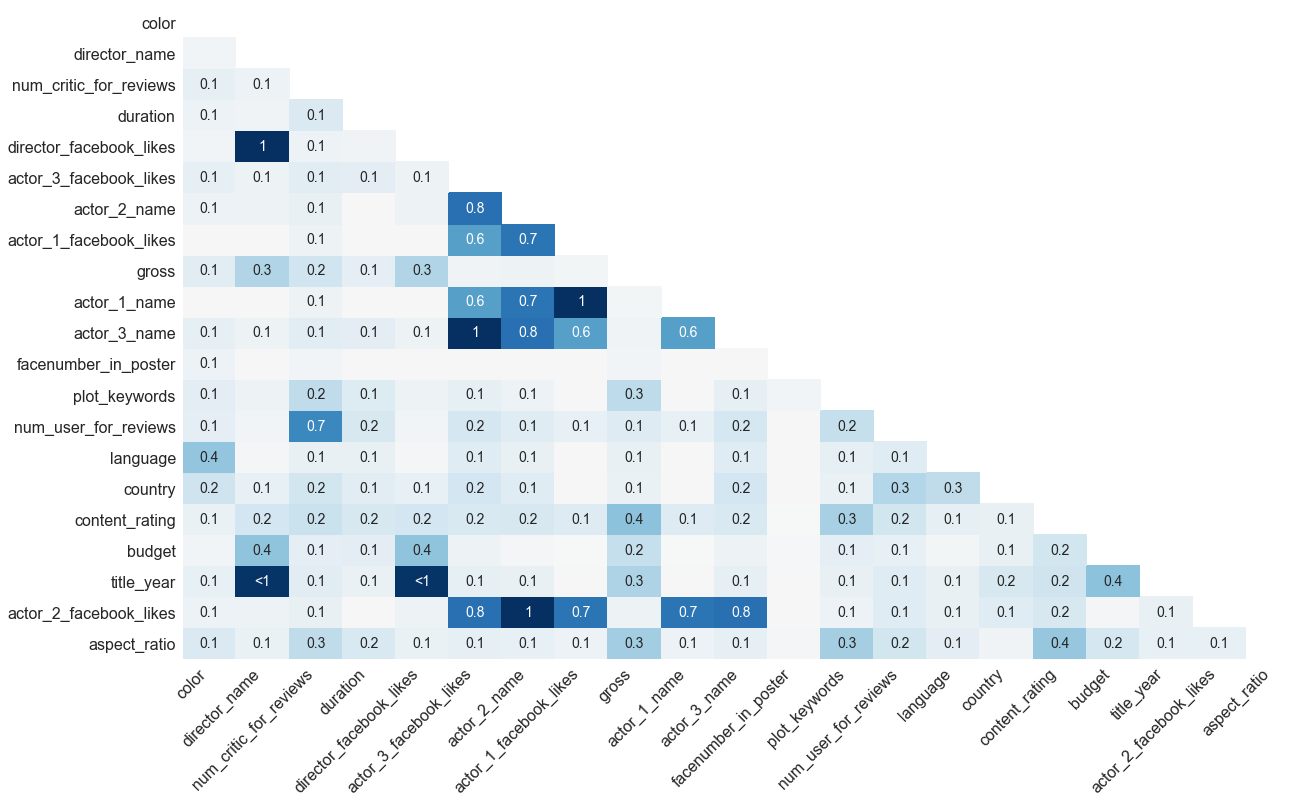

In [5]:
msno.heatmap(movie_data)

### Imputation Strategy

* It is okay to drop the samples of the features with missing data < 5%. 
* Fill in missing values of features with missing data > 5% with medean.

### Descriptive Stats

In [6]:
movie_data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### Univariate Analysis

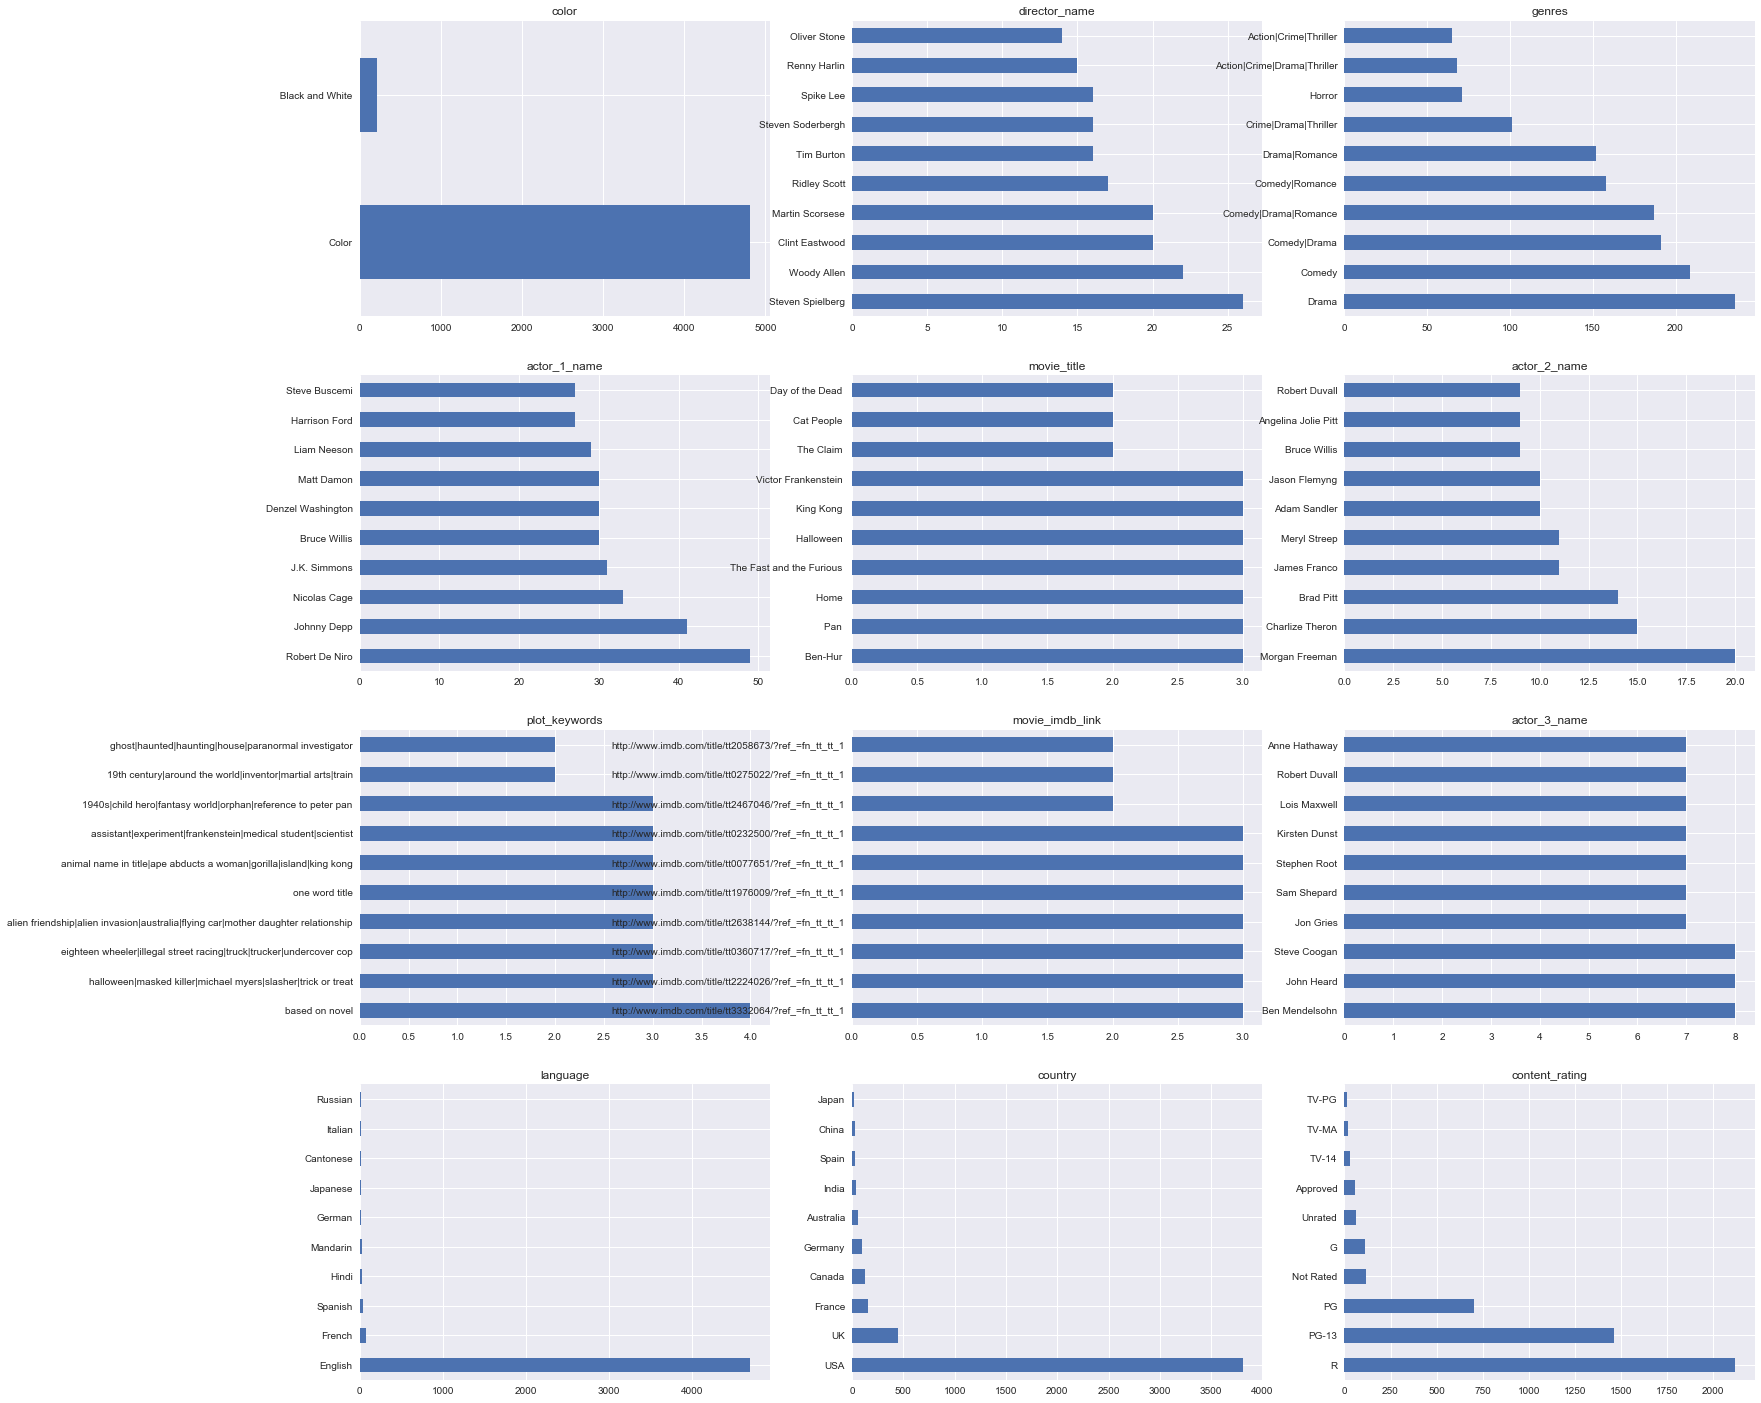

In [32]:
cols=['color','director_name','genres','actor_1_name','movie_title',
      'actor_2_name','plot_keywords','movie_imdb_link','actor_3_name','language','country','content_rating']
fig,axes=plt.subplots(nrows=4,ncols=3)
i=j=0
for col in cols:
    movie_data[col].value_counts().head(10).plot(kind='barh',ax=axes[i,j],figsize=(25,25),title=col)
    if j==2:
        j=0
        i+=1
    else:
        j+=1

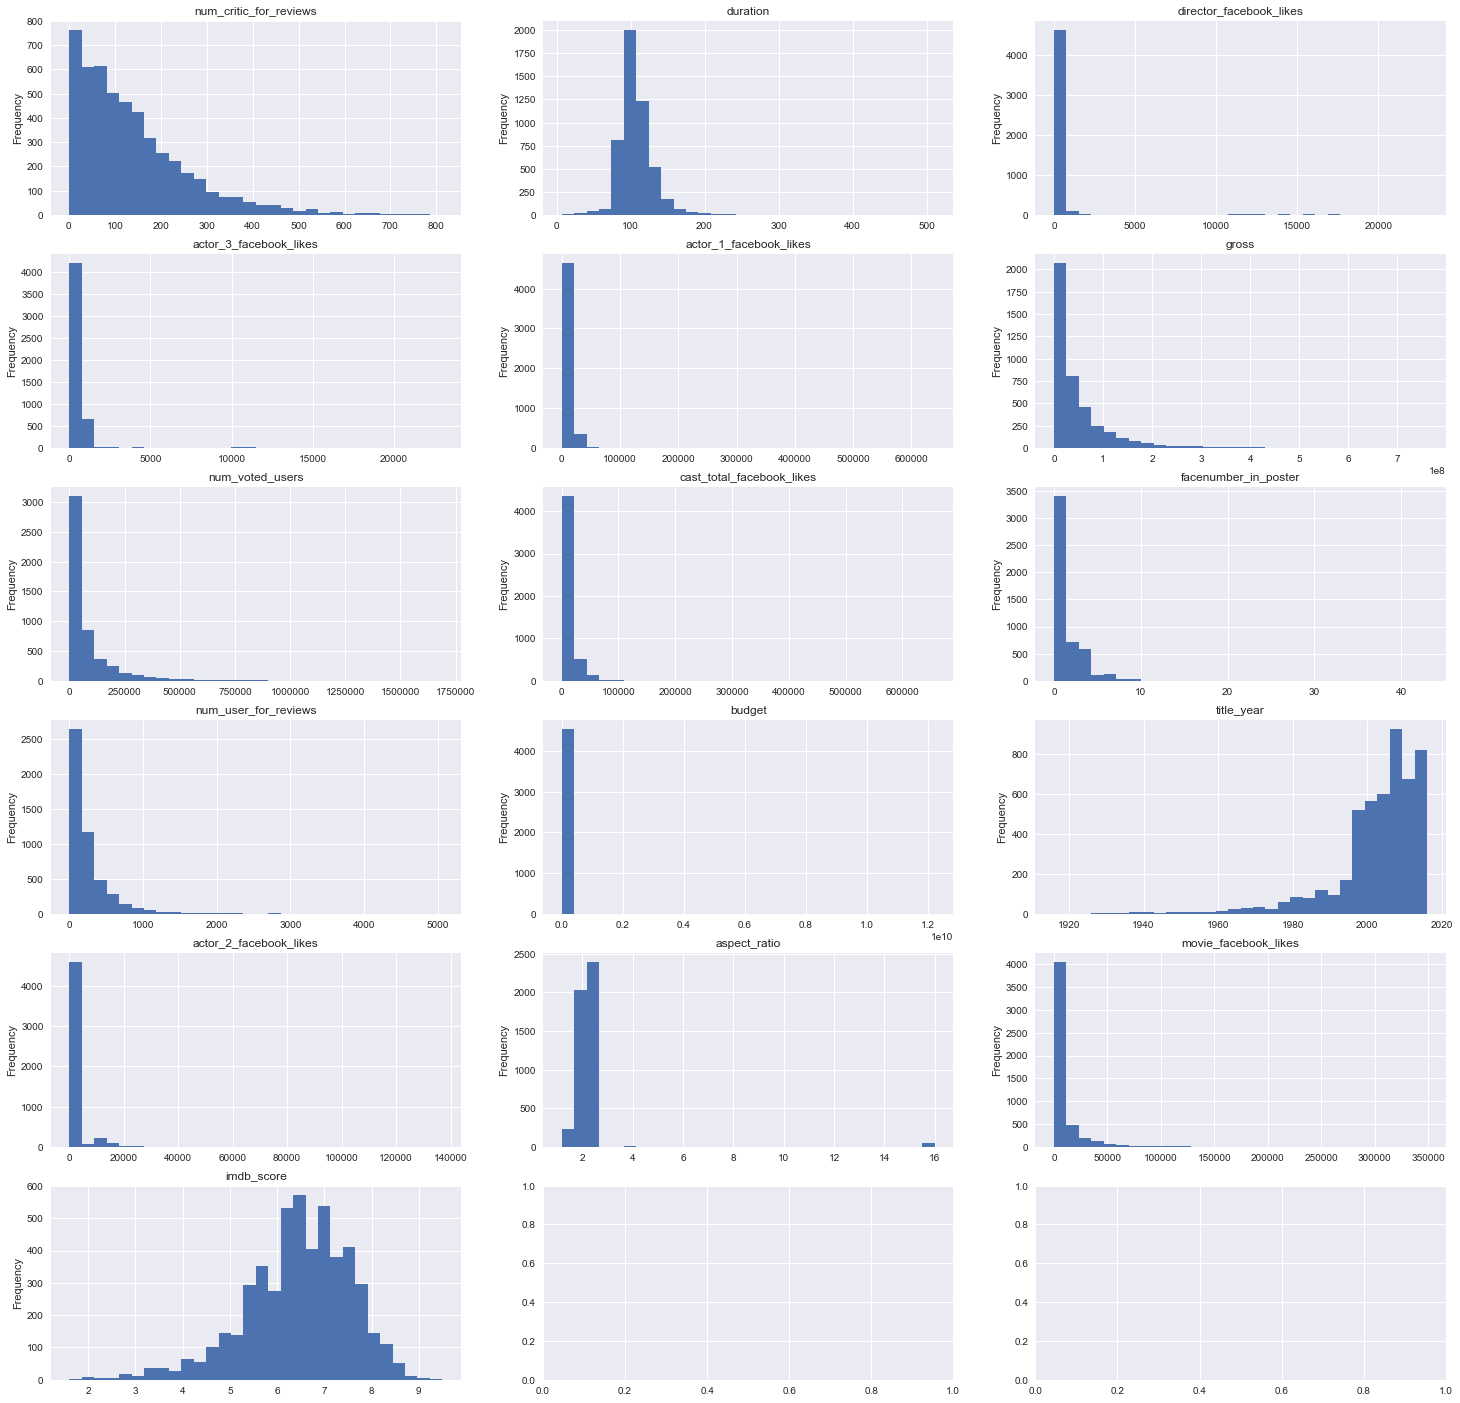

In [42]:
fig,axes=plt.subplots(nrows=6,ncols=3)
quant_cols=['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 
       'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'num_user_for_reviews',  'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes','imdb_score']
i=j=0
for col in quant_cols:
    movie_data[col].plot(kind='hist',ax=axes[i,j],figsize=(25,25),title=col,bins=30)
    if j==2:
        j=0
        i+=1
    else:
        j+=1

### Bivariate Analysis

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


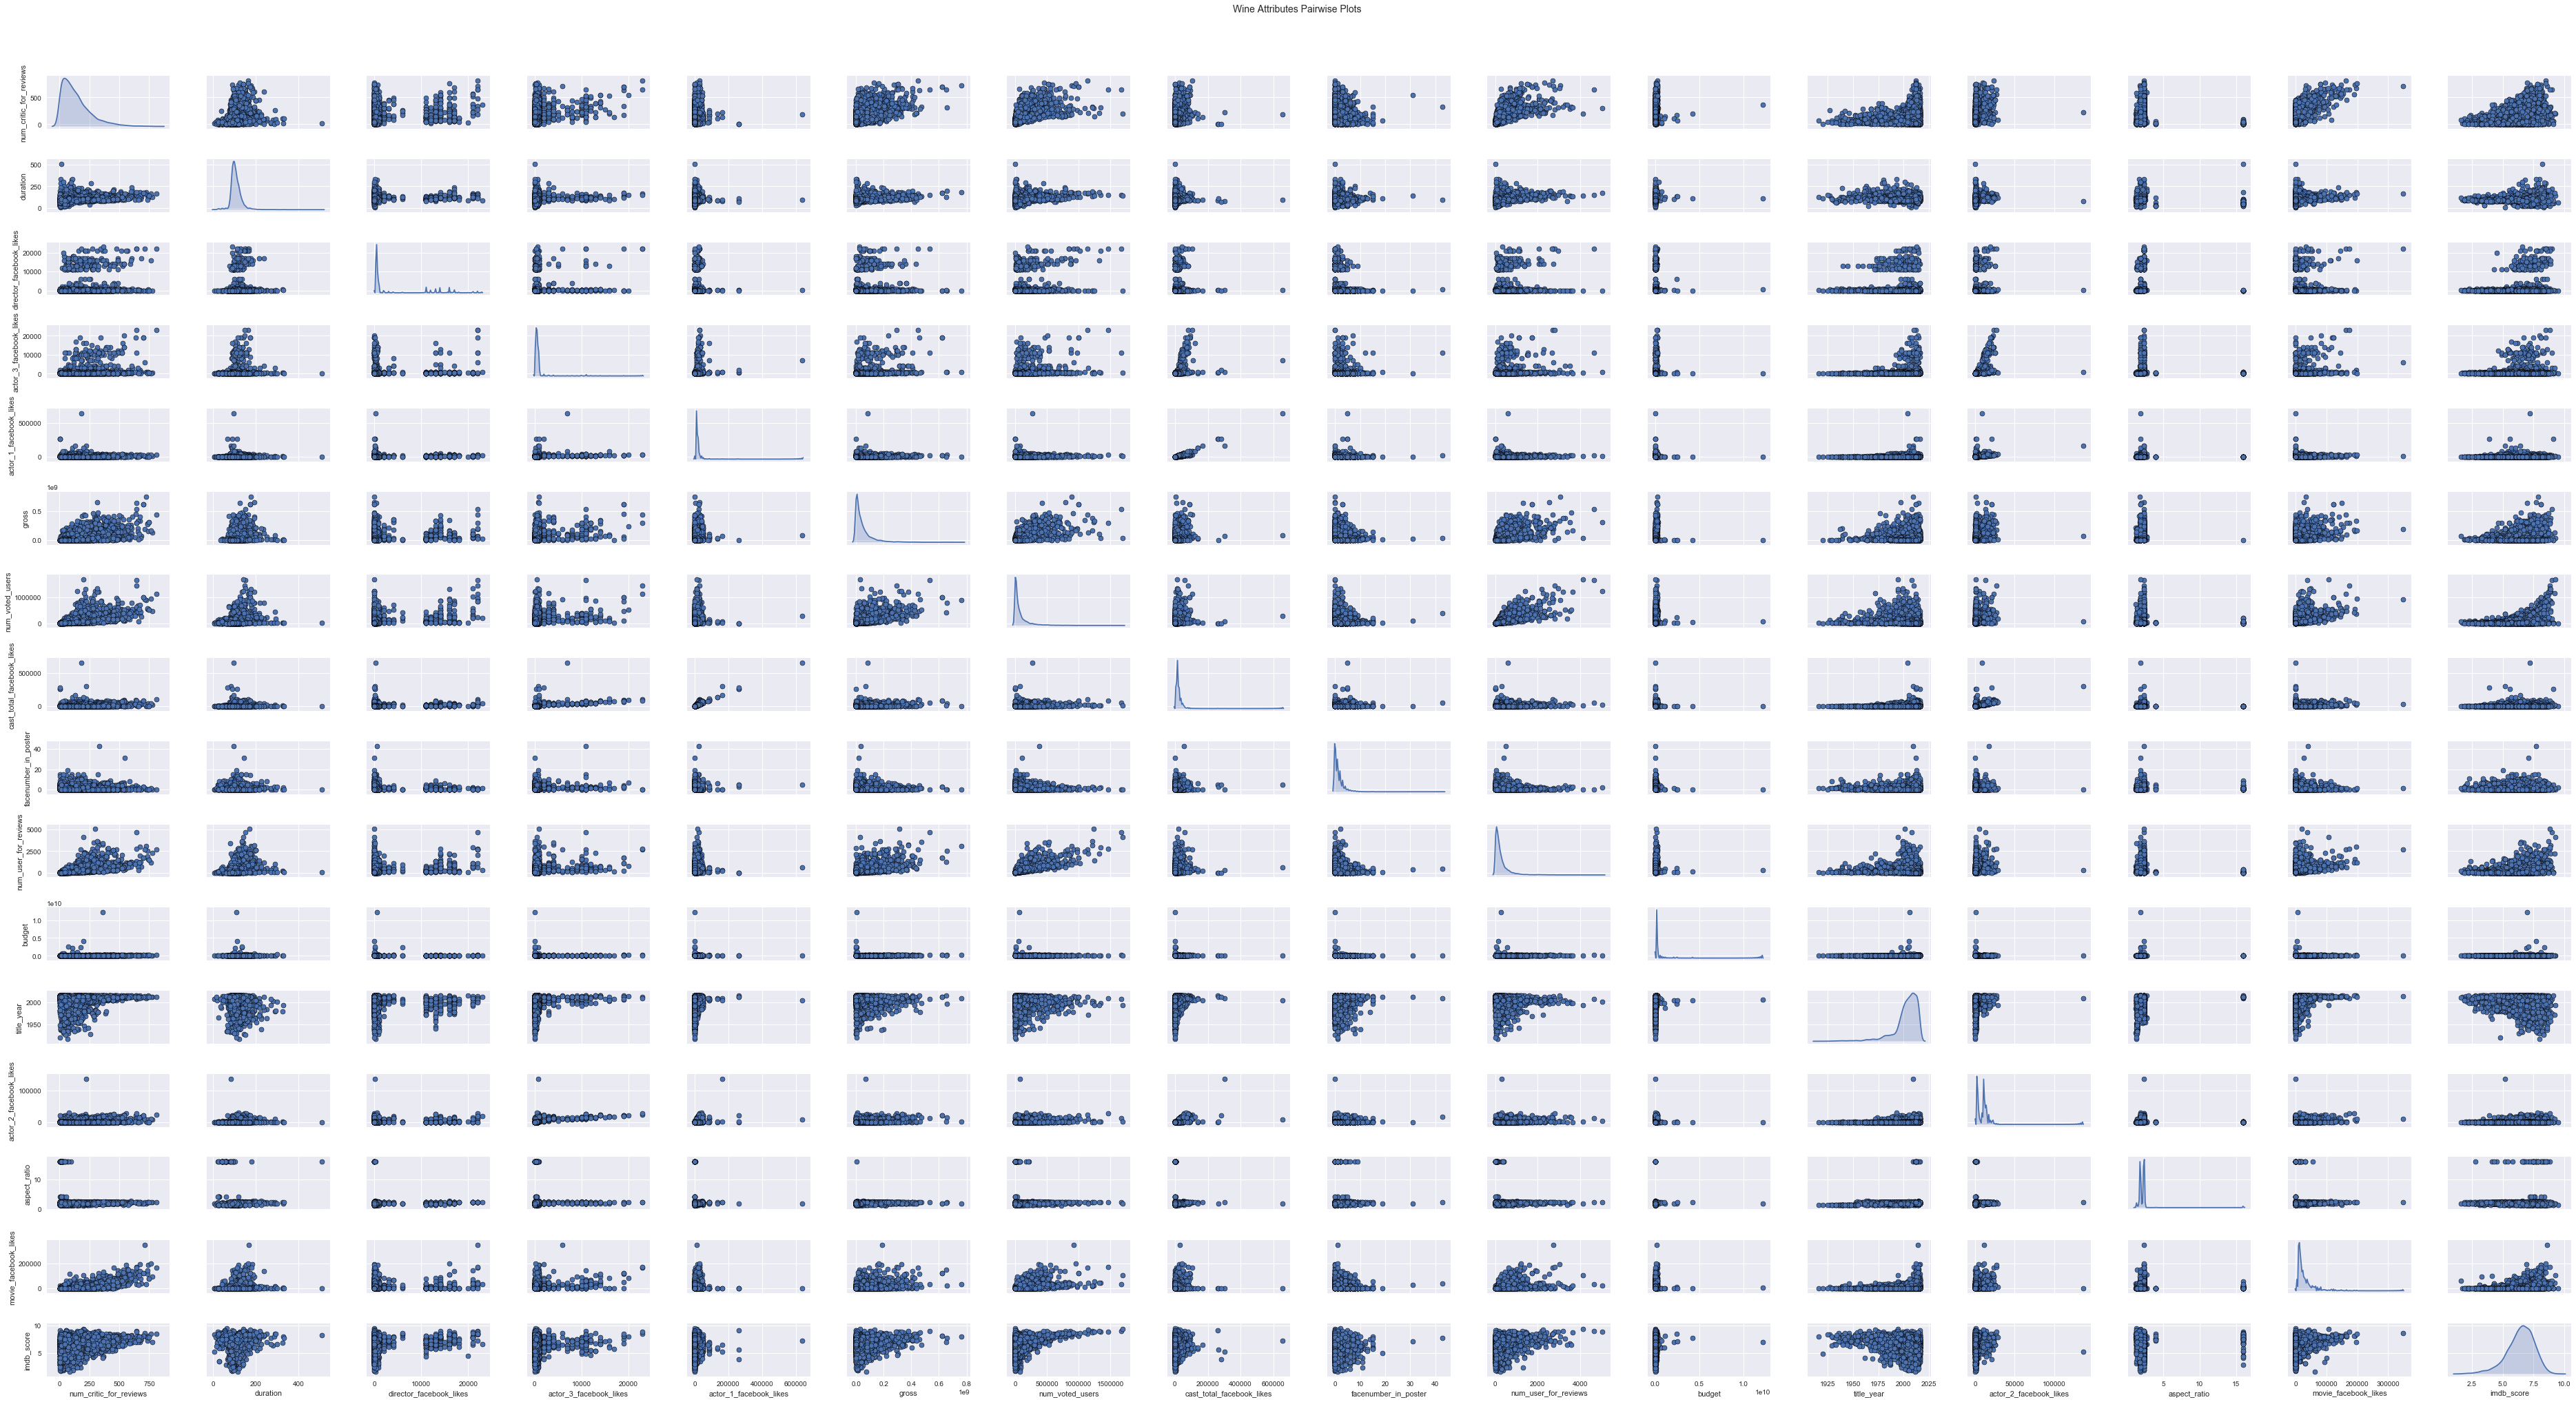

In [43]:
import seaborn as sns
# Pair-wise Scatter Plots
pp = sns.pairplot(movie_data[quant_cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)